![Texto](https://dadosaocubo.com/wp-content/uploads/2020/06/DADOS-AO-CUBO-Vers%C3%A3o-04-1.png) 

[__D³__](https://dadosaocubo.com/) by [__Tiago Dias__](https://www.linkedin.com/in/diasctiago/) 

Neste post vamos abordar um dos conceitos mais básicos dos modelos de Machine Learning (ML), mas não mesmo importante que os demais modelos. A regressão linear apesar de um modelo relativamente simples, se comparado a outros que abordaremos em outros posts, tem um grande poder de predição e é solução para diversos problemas comuns. Antes de ver a sua aplicação com a biblioteca scikit-learn, vamos ver alguns conceitos importantes que não devem ser esquecidos.

### Regressão linear

A regressão linear pode ser definida pela estatística como uma equação que busca estimar o(s) valor(es) de **y**, dados uma ou mais variáveis **x**. Sendo definido pela equação matemática:

> y = a + bx

Onde **y** é a variável dependente de **x**, **a** é coeficiente linear e **b** é o coéficiente angular. Calma que não é tão dificil quanto parece, na prática é bem mais simples, vamos em frente.

Curiosidades: 
1.   Apesar do nome, a regressão linear também lida com relações não lineares.
2.   Problemas de regressão as variáveis independentes podem ser numéricas ou categóricas, enquanto a variável explicada (dependente) é sempre numérica.

#### Teoria

Para ficar mais claro a nossa equação da regressão linear, podemos observar as variáveis **a** que vai definir o deslocamento da reta e a variável **b** que vai devinir a inclinação da reta representas na figura abaixo.

<img src="https://raw.githubusercontent.com/dadosaocubo/regressao_linear/master/RegLinear.png" width="350"/>

#### Prática

##### LinearRegression

##### Ridge

##### LASSO

#### Validação de regressão

##### Erro Quadrado Médio (Mean Squared Error)

##### Erro Médio Absoluto (Median Absolute Error)

#### Importando bibliotecas

In [68]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

Carregando dados do dataset de diabetes

In [69]:
boston = load_boston()
features, target, feature_names = boston.data, boston.target, boston.feature_names

In [70]:
df = pd.DataFrame(data=features, columns=feature_names)

In [71]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [72]:
target[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

#### Visualizando dados

In [73]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


#### Separando os dados em Treino e Teste

Selecionando apenas uma feature

In [75]:
X = df[['LSTAT']]
y = target

Dividindo os dados em treino e teste

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

#### Modelos de Regressão Linear

In [77]:
regr = LinearRegression()

Treinamento do modelo

In [78]:
regr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Predição do modelo

In [79]:
y_pred = regr.predict(X_test)

In [80]:
y_pred[:20]

array([15.86388621, 27.10368404, 15.86388621, 15.86388621, 24.97243569,
       22.5367233 , 22.5367233 , 15.86388621, 22.5367233 , 26.849964  ,
       15.86388621, 22.66358332, 26.49475594, 24.97243569, 22.5367233 ,
       22.66358332, 15.86388621, 15.86388621, 25.42913177, 15.86388621])

Avaliação do modelo

In [81]:
print('Coeficientes:', regr.coef_)
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
print('Score: %.2f' % r2_score(y_test, y_pred))

Coeficientes: [-0.025372]
Mean squared error: 79.79
Score: 0.17


#### Visualizando os resultados

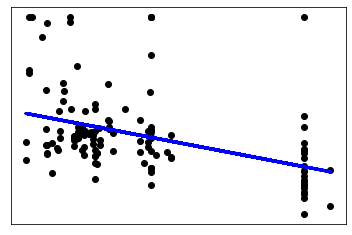

In [82]:
plt.scatter(X_test, y_test,  color='black')
plt.plot(X_test, y_pred, color='blue', linewidth=3)
plt.xticks(())
plt.yticks(())
plt.show()

### Referências
*   [Introduction to Machine Learning Algorithms: Linear Regression](https://towardsdatascience.com/introduction-to-machine-learning-algorithms-linear-regression-14c4e325882a)
*   [Regressão linear](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear)
*   [Ridge Regression for Better Usage](https://towardsdatascience.com/ridge-regression-for-better-usage-2f19b3a202db)
*   [Lasso (estatísticas)](https://pt.qwe.wiki/wiki/Lasso_(statistics))
*   [Understanding Regression Error Metrics in Python](https://www.dataquest.io/blog/understanding-regression-error-metrics/)